In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

fL = './ReadShowLeather/data/Leder.csv'
fH = './ReadShowLeather/data/Holz.csv'
fF = './ReadShowLeather/data/Fleisch.csv'
fS = '2016skin.csv'
fM = '2016material.csv'
fMF = '2016material-fake.csv'

Files = [fL, fH, fF, fM, fMF, fS]
decimals = [',',',',',','.','.','.']
Y_values= [0,0,0,0,0,1]

data = np.zeros((1,3))
for i, f in enumerate(Files):
    df = pd.read_csv(f, delimiter=';',decimal=decimals[i], index_col=0)
    df = df.dropna()
    for col in df.columns:
        Y=np.ones((len(df[col]),1))*Y_values[i]
        X1=df.index.to_numpy().reshape((-1,1))
        X2=df[col].to_numpy().reshape((-1,1))
        d=np.hstack((X1,X2,Y))
        data = np.vstack((data,d))
np.random.shuffle(data)
data = np.delete(data, 0, 0)

X= data[:,:2].reshape((-1,2))
Y= data[:,2]

print(X, Y)


[[ 876.           28.3855051 ]
 [1005.           25.47764185]
 [1301.           93.57371407]
 ...
 [ 839.           23.86045761]
 [1410.           45.78541682]
 [1395.            6.10570016]] [1. 1. 0. ... 1. 0. 1.]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   21.8s


building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 67 of 200
building tree 68 of 200
building tree 69 of 200
building tree 70 of 200
building tree 71 of 200
building tree 72 of 200
building tree 73 of 200
building tree 74 of 200
building tree 75 of 200
building tree 76 of 200
building tree 77 of 200
building tree 78 of 200
building tree 79

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.6min


building tree 159 of 200
building tree 160 of 200
building tree 161 of 200
building tree 162 of 200
building tree 163 of 200
building tree 164 of 200
building tree 165 of 200
building tree 166 of 200
building tree 167 of 200
building tree 168 of 200
building tree 169 of 200
building tree 170 of 200
building tree 171 of 200
building tree 172 of 200
building tree 173 of 200
building tree 174 of 200
building tree 175 of 200
building tree 176 of 200
building tree 177 of 200
building tree 178 of 200
building tree 179 of 200
building tree 180 of 200
building tree 181 of 200
building tree 182 of 200
building tree 183 of 200
building tree 184 of 200
building tree 185 of 200
building tree 186 of 200
building tree 187 of 200
building tree 188 of 200
building tree 189 of 200
building tree 190 of 200
building tree 191 of 200
building tree 192 of 200
building tree 193 of 200
building tree 194 of 200
building tree 195 of 200
building tree 196 of 200
building tree 197 of 200
building tree 198 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.1min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    1.1s finished


RFC Accuracy: 0.954347996755031


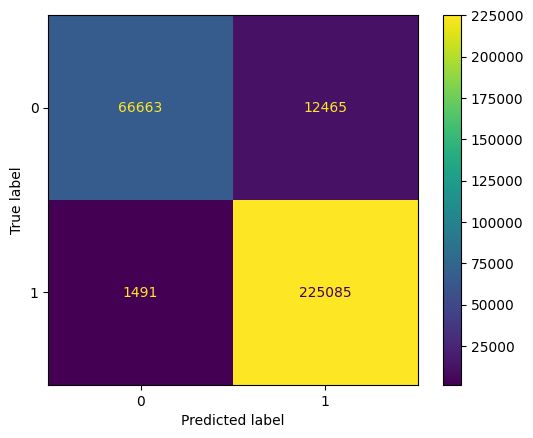

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8, random_state=42)

# svc_model = SVC(kernel='linear',verbose=2)
rfc_model = RFC(n_estimators=200,criterion="log_loss",max_depth=10,n_jobs=-1,verbose=2)
# Train the model
#svc_model.fit(X_train, y_train)
rfc_model.fit(X_train, y_train)

#svc_y_pred = svc_model.predict(X_test)
rfc_y_pred = rfc_model.predict(X_test)

#accuracy_svc = accuracy_score(y_test, svc_y_pred)
accuracy_rfc = accuracy_score(y_test, rfc_y_pred)
#print("SVC Accuracy:", accuracy_svc)
print("RFC Accuracy:", accuracy_rfc)

#cm_svc = confusion_matrix(y_test, svc_y_pred)
#disp_svc = ConfusionMatrixDisplay(cm_svc)
#disp_svc.plot()

cm_rfc = confusion_matrix(y_test, rfc_y_pred)
disp_rfc = ConfusionMatrixDisplay(cm_rfc)
disp_rfc.plot()



In [ ]:
disp_rfc.figure_.savefig("plt.png")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 40
building tree 2 of 40
building tree 3 of 40
building tree 4 of 40
building tree 5 of 40
building tree 6 of 40
building tree 7 of 40
building tree 8 of 40
building tree 9 of 40
building tree 10 of 40
building tree 11 of 40
building tree 12 of 40
building tree 13 of 40
building tree 14 of 40
building tree 15 of 40
building tree 16 of 40
building tree 17 of 40
building tree 18 of 40
building tree 19 of 40
building tree 20 of 40
building tree 21 of 40
building tree 22 of 40
building tree 23 of 40
building tree 24 of 40
building tree 25 of 40
building tree 26 of 40
building tree 27 of 40
building tree 28 of 40
building tree 29 of 40
building tree 30 of 40
building tree 31 of 40
building tree 32 of 40
building tree 33 of 40
building tree 34 of 40
building tree 35 of 40
building tree 36 of 40
building tree 37 of 40


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.4s


building tree 38 of 40
building tree 39 of 40
building tree 40 of 40


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   17.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.2s finished


RFC Accuracy: 0.9117054405568785


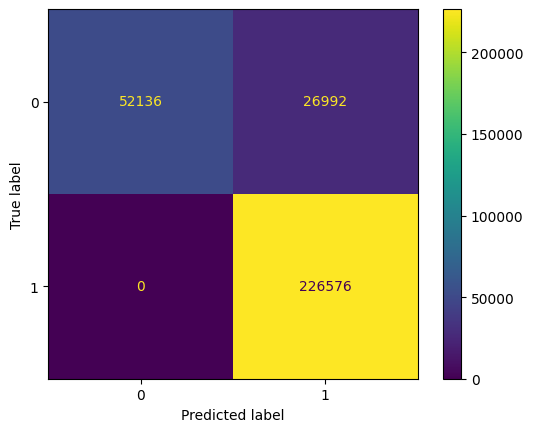

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8, random_state=42)

class_weights = {0:1, 1:47}
rfc_model = RFC(n_estimators=40,criterion="log_loss",max_depth=6,n_jobs=-1,class_weight=class_weights,verbose=2)

# Train the model
rfc_model.fit(X_train, y_train)

threshold = 0.3  # Adjust the threshold as needed
y_pred_prob = rfc_model.predict_proba(X_test)[:, 1]
rfc_y_pred = (y_pred_prob > threshold).astype(int)

# rfc_y_pred = rfc_model.predict(X_test)

accuracy_rfc = accuracy_score(y_test, rfc_y_pred)
print("RFC Accuracy:", accuracy_rfc)


cm_rfc = confusion_matrix(y_test, rfc_y_pred)
disp_rfc = ConfusionMatrixDisplay(cm_rfc)
disp_rfc.plot()



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 40
building tree 2 of 40
building tree 3 of 40
building tree 4 of 40
building tree 5 of 40
building tree 6 of 40
building tree 7 of 40
building tree 8 of 40
building tree 9 of 40
building tree 10 of 40
building tree 11 of 40
building tree 12 of 40
building tree 13 of 40
building tree 14 of 40
building tree 15 of 40
building tree 16 of 40
building tree 17 of 40
building tree 18 of 40
building tree 19 of 40
building tree 20 of 40
building tree 21 of 40
building tree 22 of 40
building tree 23 of 40
building tree 24 of 40
building tree 25 of 40
building tree 26 of 40
building tree 27 of 40
building tree 28 of 40
building tree 29 of 40
building tree 30 of 40
building tree 31 of 40
building tree 32 of 40
building tree 33 of 40
building tree 34 of 40
building tree 35 of 40
building tree 36 of 40
building tree 37 of 40


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   18.1s


building tree 38 of 40
building tree 39 of 40
building tree 40 of 40


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   21.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.2s finished


RFC Accuracy: 0.9064323659487609


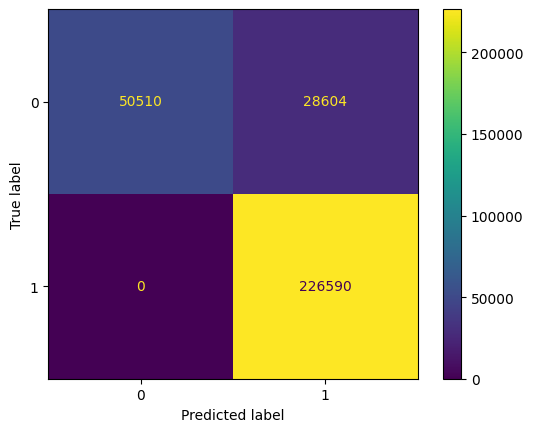

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8, random_state=42)

class_weights = {0:2, 1:33}
rfc_model = RFC(n_estimators=40,criterion="log_loss",max_depth=8,n_jobs=-1,min_samples_leaf=3,class_weight=class_weights,verbose=2)

# Train the model
rfc_model.fit(X_train, y_train)

threshold = 0.1 # Adjust the threshold as needed
y_pred_prob = rfc_model.predict_proba(X_test)[:, 1]
rfc_y_pred = (y_pred_prob > threshold).astype(int)

# rfc_y_pred = rfc_model.predict(X_test)

accuracy_rfc = accuracy_score(y_test, rfc_y_pred)
print("RFC Accuracy:", accuracy_rfc)


cm_rfc = confusion_matrix(y_test, rfc_y_pred)
disp_rfc = ConfusionMatrixDisplay(cm_rfc)
disp_rfc.plot()

